# Testing for Cointegration amongst German Stocks

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_datareader import data
from datetime import datetime
from numpy.random import randn
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Import all DAX adjusted closing prices for the past 10 years

In [1]:
# Create a list of ticker symbols for DAX stocks
dax_tickers = ['1COV.DE', 'ADS.DE', 'ALV.DE', 'BAS.DE', 'BAYN.DE', 'BEI.DE', 'BMW.DE', 'CON.DE', 'DAI.DE', 
               'DB1.DE', 'DBK.DE', 'DPW.DE', 'DTE.DE', 'DWNI.DE', 'EOAN.DE', 'FME.DE', 'FRE.DE', 'HEI.DE', 
               'HEN3.DE', 'IFX.DE', 'LIN.DE', 'MRK.DE', 'MTX.DE', 'MUV2.DE', 'RWE.DE', 'SAP.DE', 'SIE.DE', 
               'VNA.DE', 'VOW3.DE', 'WDI.DE']

In [3]:
# Define start and end date
start = datetime(2010, 8, 10)
end = datetime(2020, 8, 12)

In [5]:
# Import the adjusted closing prices for these stocks from Yahoo Finance
dax_prices = data.DataReader(dax_tickers, data_source='yahoo', start=start, end=end)['Adj Close']

In [6]:
len(dax_prices)

2538

In [7]:
dax_prices.isna().any()

Symbols
1COV.DE     True
ADS.DE     False
ALV.DE     False
BAS.DE     False
BAYN.DE    False
BEI.DE     False
BMW.DE     False
CON.DE     False
DAI.DE     False
DB1.DE     False
DBK.DE     False
DPW.DE     False
DTE.DE     False
DWNI.DE    False
EOAN.DE    False
FME.DE     False
FRE.DE     False
HEI.DE     False
HEN3.DE    False
IFX.DE     False
LIN.DE     False
MRK.DE     False
MTX.DE     False
MUV2.DE    False
RWE.DE     False
SAP.DE     False
SIE.DE     False
VNA.DE      True
VOW3.DE    False
WDI.DE     False
dtype: bool

## Augmented Dickey-Fuller Test

In [136]:
for tick in dax_prices.columns:
    if tick not in ['1COV.DE', 'VNA.DE']:
        print(str(tick) + ':', ts.adfuller(dax_prices[tick], 1)[1])

ADS.DE: 0.9413156943784025
ALV.DE: 0.8153080260894605
BAS.DE: 0.13833076240288156
BAYN.DE: 0.3833245632265413
BEI.DE: 0.5698395711304872
BMW.DE: 0.07753155787989553
CON.DE: 0.474669409896456
DAI.DE: 0.28278575699495134
DB1.DE: 0.9871457631693894
DBK.DE: 0.28205418544000616
DPW.DE: 0.913813832886015
DTE.DE: 0.8395611331693819
DWNI.DE: 0.9431199057212125
EOAN.DE: 0.05162175467674129
FME.DE: 0.3416015141112708
FRE.DE: 0.47389213257308305
HEI.DE: 0.3421878742643235
HEN3.DE: 0.381319593479005
IFX.DE: 0.7912373698416164
LIN.DE: 0.9942220261526507
MRK.DE: 0.8214693647614901
MTX.DE: 0.7228813849990787
MUV2.DE: 0.8946035623380523
RWE.DE: 0.36070559044647876
SAP.DE: 0.9774585828001507
SIE.DE: 0.6242984334989041
VOW3.DE: 0.023410841748052105
WDI.DE: 0.55020561853442


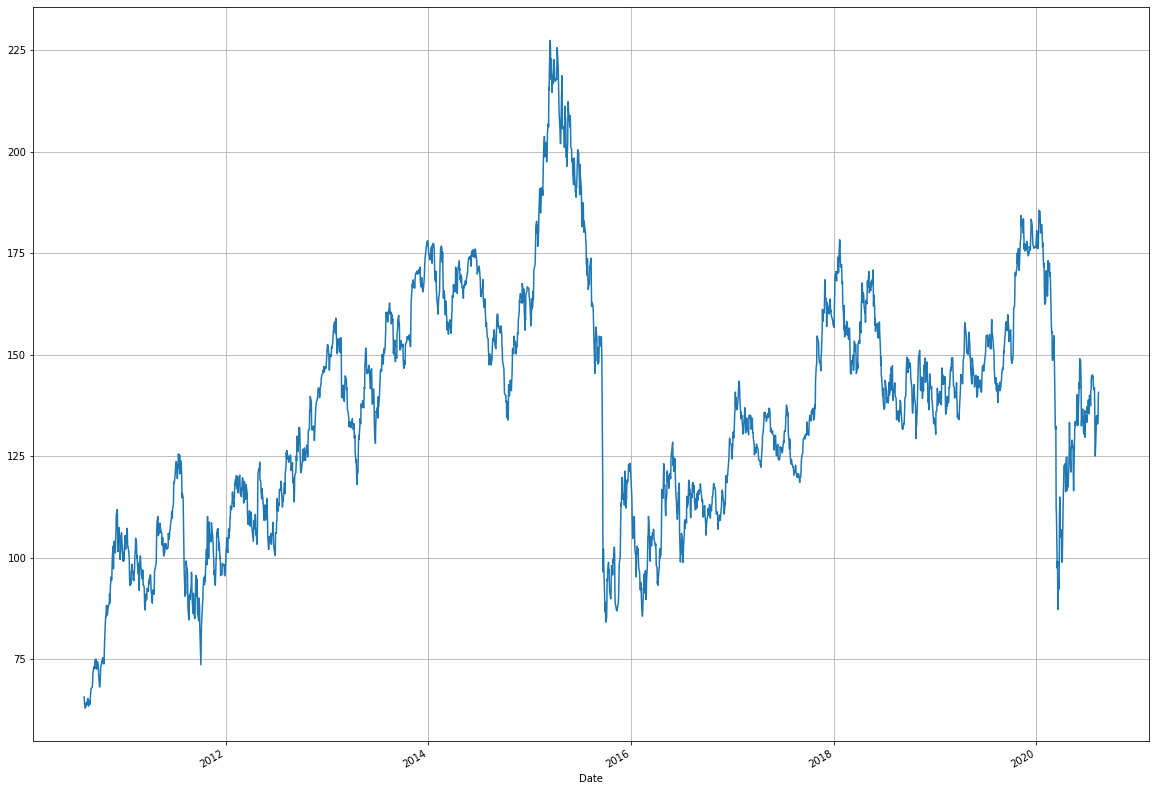

In [21]:
dax_prices['VOW3.DE'].plot(grid=True, figsize=(20,15))

## Autocorrelation function

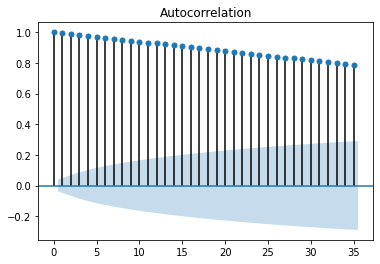

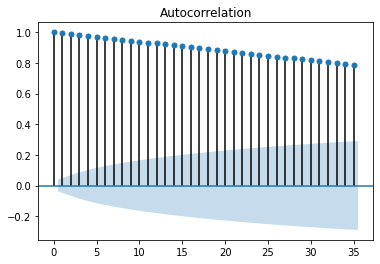

In [24]:
plot_acf(dax_prices['VOW3.DE'])

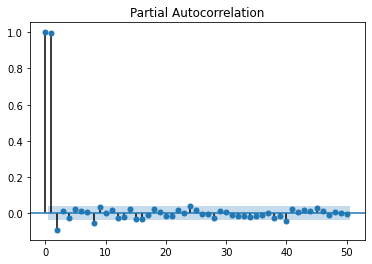

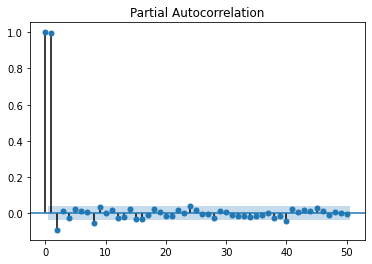

In [25]:
plot_pacf(dax_prices['VOW3.DE'], lags=50)

## Hurst Exponent

In [101]:
def hurst(ts):
    
    ts= np.array(ts)
    # Create the range of lag values
    lags = range(2, 100)
    
    #Calculate the array of the variances of the lagged differences
    tau = [np.sqrt(np.std(np.subtract(ts[lag:], ts[:-lag]))) for lag in lags]
    
    # Use a linear fit to estimate the Hurst Exponent
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    
    # Return the Hurst exponent from the polyfit output
    return poly[0]*2.0

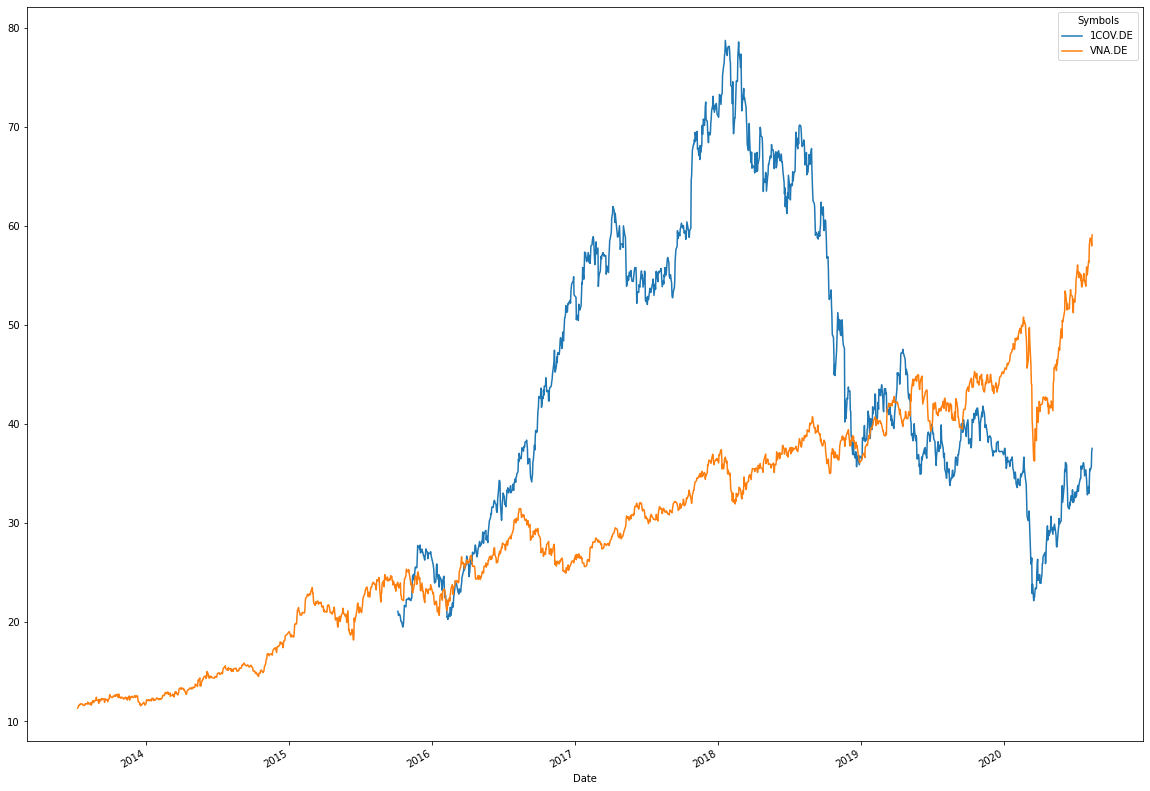

In [227]:
dax_prices[['1COV.DE', 'VNA.DE']].plot(figsize=(20,15))

In [106]:
for tick in dax_prices.columns:
    if tick not in ['1COV.DE', 'VNA.DE']:
        print(str(tick) + ':', hurst(dax_prices[tick]))

ADS.DE: 0.4586274131813606
ALV.DE: 0.4119187073303339
BAS.DE: 0.5135442590402757
BAYN.DE: 0.4474227042894894
BEI.DE: 0.4432691080104513
BMW.DE: 0.45564110166796407
CON.DE: 0.5123812384689974
DAI.DE: 0.4967673948898697
DB1.DE: 0.3670695036360567
DBK.DE: 0.4609412282806965
DPW.DE: 0.5100643391150417
DTE.DE: 0.4010828445575381
DWNI.DE: 0.45993660053581303
EOAN.DE: 0.4372493417855432
FME.DE: 0.4157893237424112
FRE.DE: 0.45120162011765785
HEI.DE: 0.4894459281062279
HEN3.DE: 0.458906386185598
IFX.DE: 0.4279981617715986
LIN.DE: 0.4509764955008736
MRK.DE: 0.44095377609306896
MTX.DE: 0.541878106491774
MUV2.DE: 0.4285916588436107
RWE.DE: 0.4775794403639153
SAP.DE: 0.4498875509481748
SIE.DE: 0.4809927095268873
VOW3.DE: 0.4934083006557595
WDI.DE: 0.45239383931018295


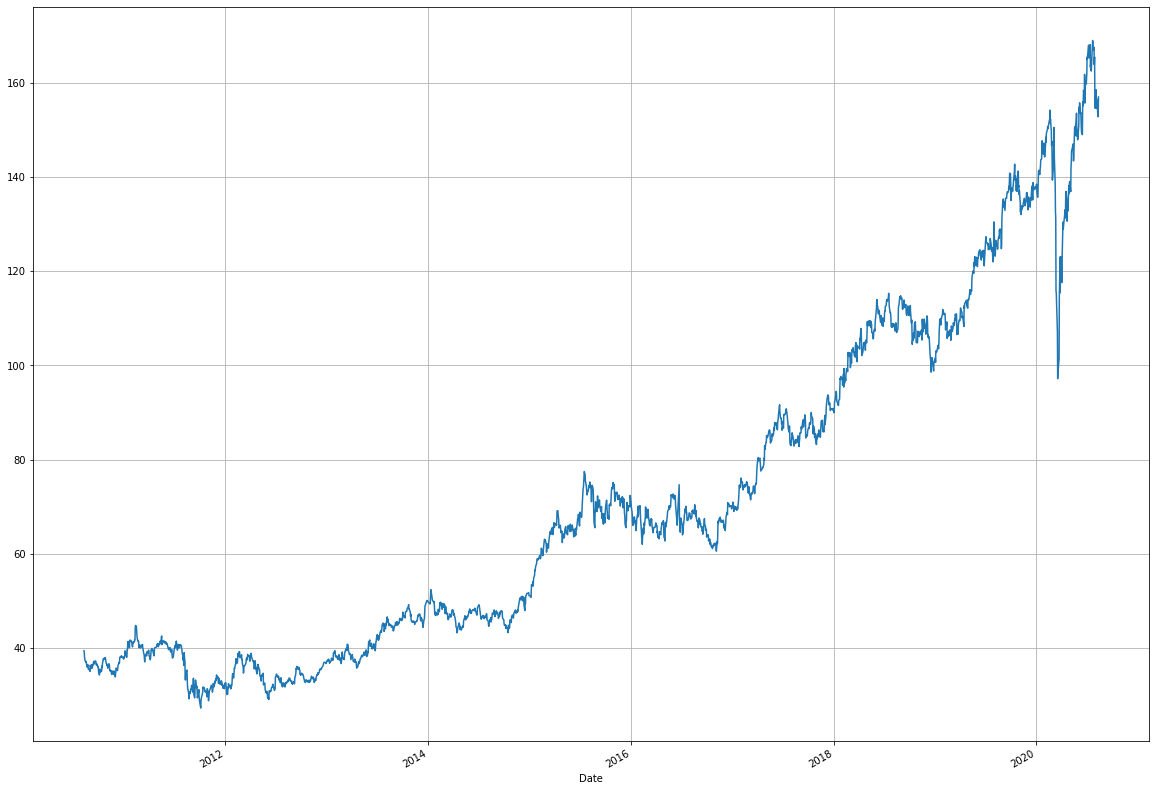

In [107]:
dax_prices['DB1.DE'].plot(grid=True, figsize=(20,15))

## Plot ACF and PACF

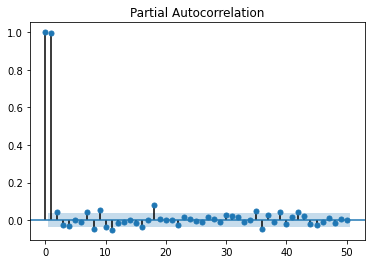

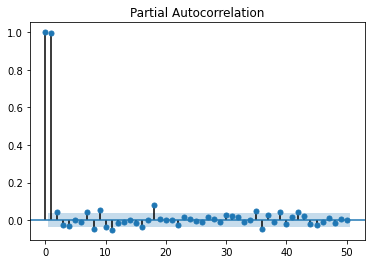

In [152]:
plot_pacf(dax_prices['DB1.DE'], lags=50)

## Machine Learning to predict VW

In [168]:
vw = pd.DataFrame()
vw['Adj Close'] = dax_prices['VOW3.DE'].copy()

In [169]:
lags = range(1,9)
for lag in lags:
    vw['lag' + str(lag)] = vw['Adj Close'].shift(lag)

In [170]:
vw.head(10)

,Adj Close,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
Date,,,,,,,,,
2010-08-09,65.661133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-10,65.334328,65.661133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-11,63.782051,65.334328,65.661133,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-12,63.667686,63.782051,65.334328,65.661133,NaN,NaN,NaN,NaN,NaN
2010-08-13,62.924210,63.667686,63.782051,65.334328,65.661133,NaN,NaN,NaN,NaN
2010-08-16,63.398064,62.924210,63.667686,63.782051,65.334328,65.661133,NaN,NaN,NaN
2010-08-17,64.215065,63.398064,62.924210,63.667686,63.782051,65.334328,65.661133,NaN,NaN
2010-08-18,63.749374,64.215065,63.398064,62.924210,63.667686,63.782051,65.334328,65.661133,NaN
2010-08-19,64.198723,63.749374,64.215065,63.398064,62.924210,63.667686,63.782051,65.334328,65.661133


In [171]:
vw_test = vw.iloc[8:,:]
vw_test.head()

,Adj Close,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
Date,,,,,,,,,
2010-08-19,64.198723,63.749374,64.215065,63.398064,62.924210,63.667686,63.782051,65.334328,65.661133
2010-08-20,64.427475,64.198723,63.749374,64.215065,63.398064,62.924210,63.667686,63.782051,65.334328
2010-08-23,65.268974,64.427475,64.198723,63.749374,64.215065,63.398064,62.924210,63.667686,63.782051
2010-08-24,64.607224,65.268974,64.427475,64.198723,63.749374,64.215065,63.398064,62.924210,63.667686
2010-08-25,63.398064,64.607224,65.268974,64.427475,64.198723,63.749374,64.215065,63.398064,62.924210


In [172]:
train_len = round(len(vw_test) * 0.6)
valid_len = round(len(vw_test) * 0.2)
test_len = len(vw) - (train_len + valid_len)
train_len, valid_len, test_len

(1518, 506, 514)

In [173]:
vw_train_X = vw_test.iloc[:train_len, 1:]
vw_train_y = vw_test.iloc[:train_len, :1]

In [174]:
vw_valid_X = vw_test.iloc[train_len:(train_len+valid_len), 1:]
vw_valid_y = vw_test.iloc[train_len:(train_len+valid_len), :1]

In [175]:
rf = RandomForestRegressor(random_state = 420)
rf.fit(vw_train_X, np.array(vw_train_y).ravel())

RandomForestRegressor(random_state=420)

In [176]:
rf.score(vw_valid_X, np.array(vw_valid_y).ravel())

0.9825908462086921

In [177]:
vw_baseline = vw_test.iloc[train_len:(train_len+valid_len), 1:2]
vw_pred = rf.predict(vw_valid_X)

In [178]:
def scoring(true, pred):
    print('mse: ', mean_squared_error(true, pred))
    print('mae: ', mean_absolute_error(true, pred))
    print('r2: ', r2_score(true, pred))

In [179]:
scoring(vw_valid_y, vw_baseline)

mse:  4.510063633198593
mae:  1.5821776710480098
r2:  0.9855219547653824


In [180]:
scoring(vw_valid_y, vw_pred)

mse:  5.423134831158256
mae:  1.8050746584504016
r2:  0.9825908462086921


## Correlation between stocks

In [184]:
corr = dax_prices.corr().abs()

In [198]:
s = corr.unstack()
so = s.sort_values(kind='quicksort')
so[-60:-30]

Symbols  Symbols
ADS.DE   ALV.DE     0.948311
ALV.DE   ADS.DE     0.948311
MUV2.DE  DB1.DE     0.948940
DB1.DE   MUV2.DE    0.948940
DWNI.DE  IFX.DE     0.952183
IFX.DE   DWNI.DE    0.952183
ALV.DE   BEI.DE     0.953111
BEI.DE   ALV.DE     0.953111
DAI.DE   CON.DE     0.954490
CON.DE   DAI.DE     0.954490
FRE.DE   HEN3.DE    0.954878
HEN3.DE  FRE.DE     0.954878
MTX.DE   ADS.DE     0.959015
ADS.DE   MTX.DE     0.959015
VNA.DE   SAP.DE     0.959096
SAP.DE   VNA.DE     0.959096
MUV2.DE  SAP.DE     0.959286
SAP.DE   MUV2.DE    0.959286
DTE.DE   MRK.DE     0.960701
MRK.DE   DTE.DE     0.960701
SAP.DE   DB1.DE     0.960739
DB1.DE   SAP.DE     0.960739
SAP.DE   ALV.DE     0.961831
ALV.DE   SAP.DE     0.961831
ADS.DE   SAP.DE     0.965747
SAP.DE   ADS.DE     0.965747
ALV.DE   MUV2.DE    0.967142
MUV2.DE  ALV.DE     0.967142
DB1.DE   VNA.DE     0.967754
VNA.DE   DB1.DE     0.967754
dtype: float64

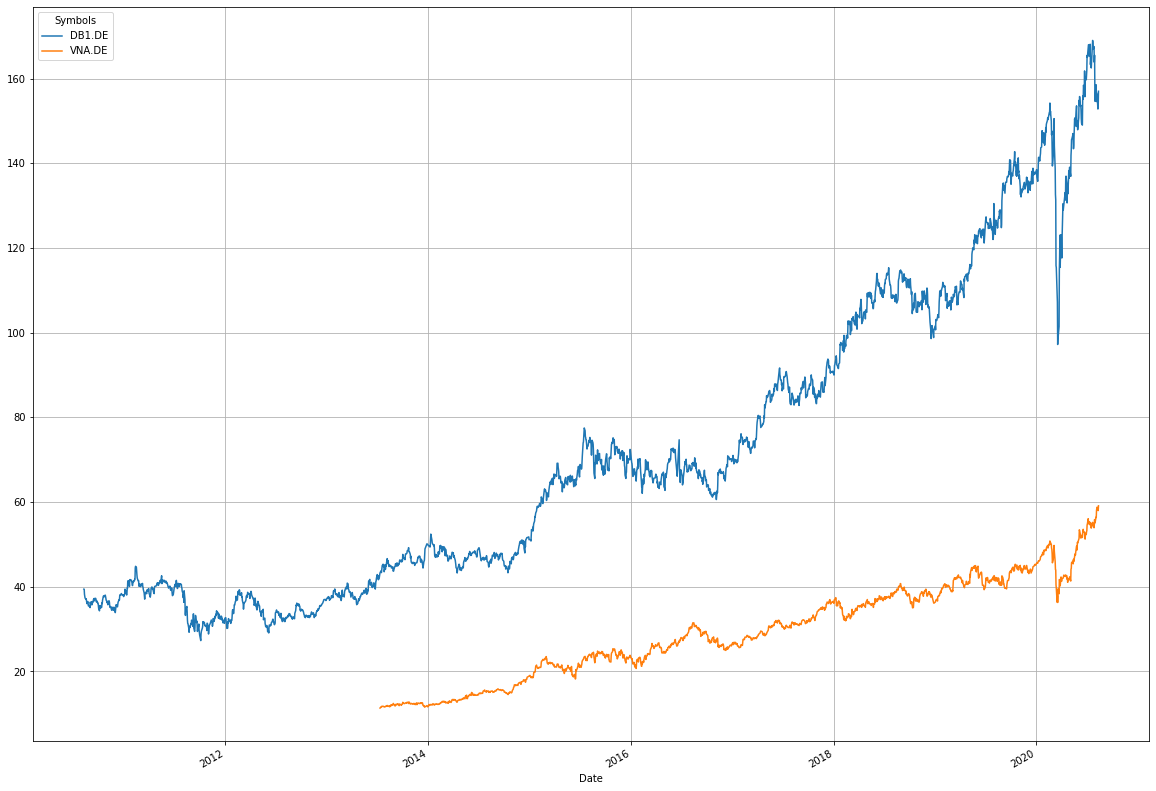

In [199]:
dax_prices[['DB1.DE', 'VNA.DE']].plot(grid=True, figsize=(20,15))

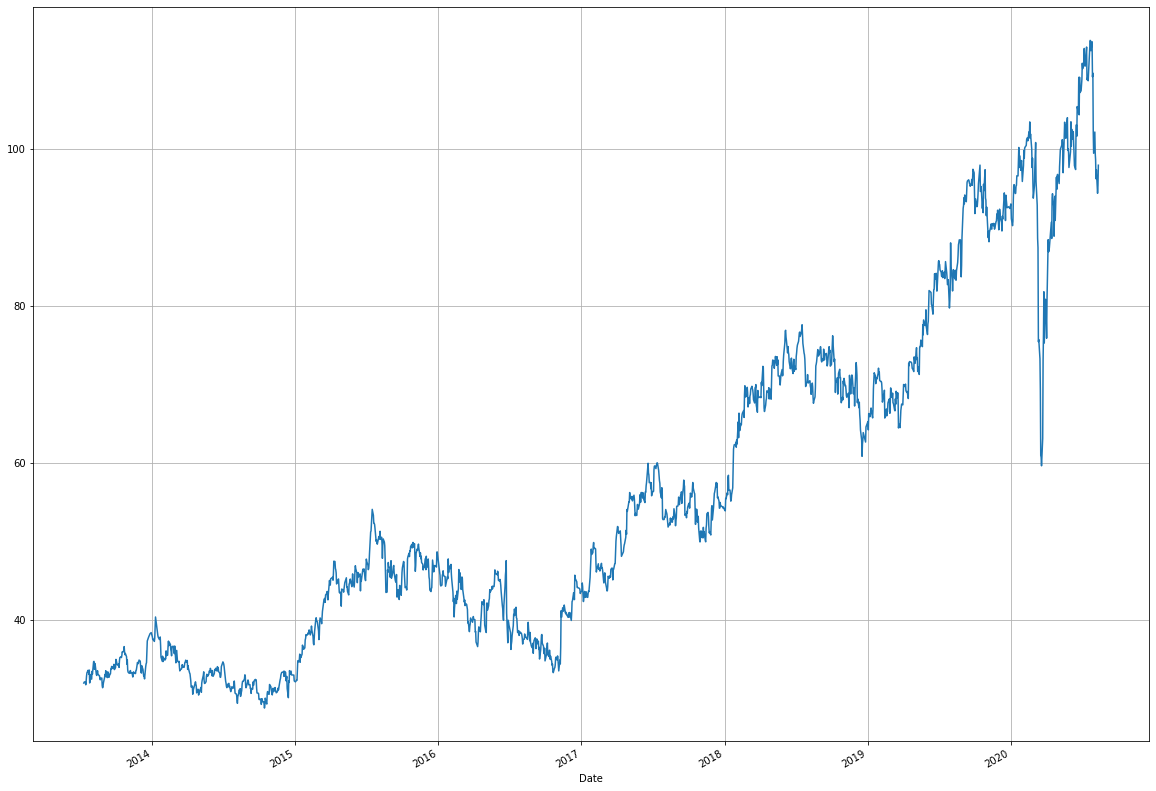

In [203]:
db1_vna = dax_prices['DB1.DE'] - dax_prices['VNA.DE']
db1_vna.plot(grid=True, figsize=(20,15))

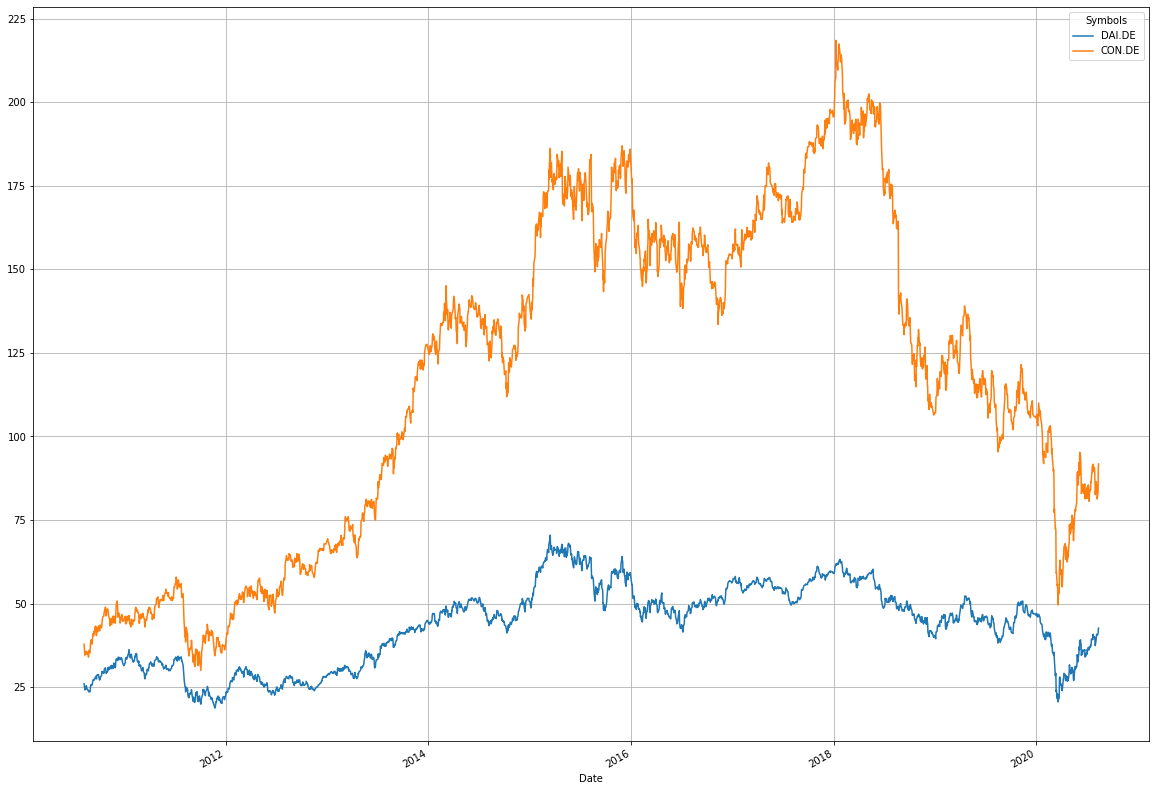

In [200]:
dax_prices[['DAI.DE', 'CON.DE']].plot(grid=True, figsize=(20,15))

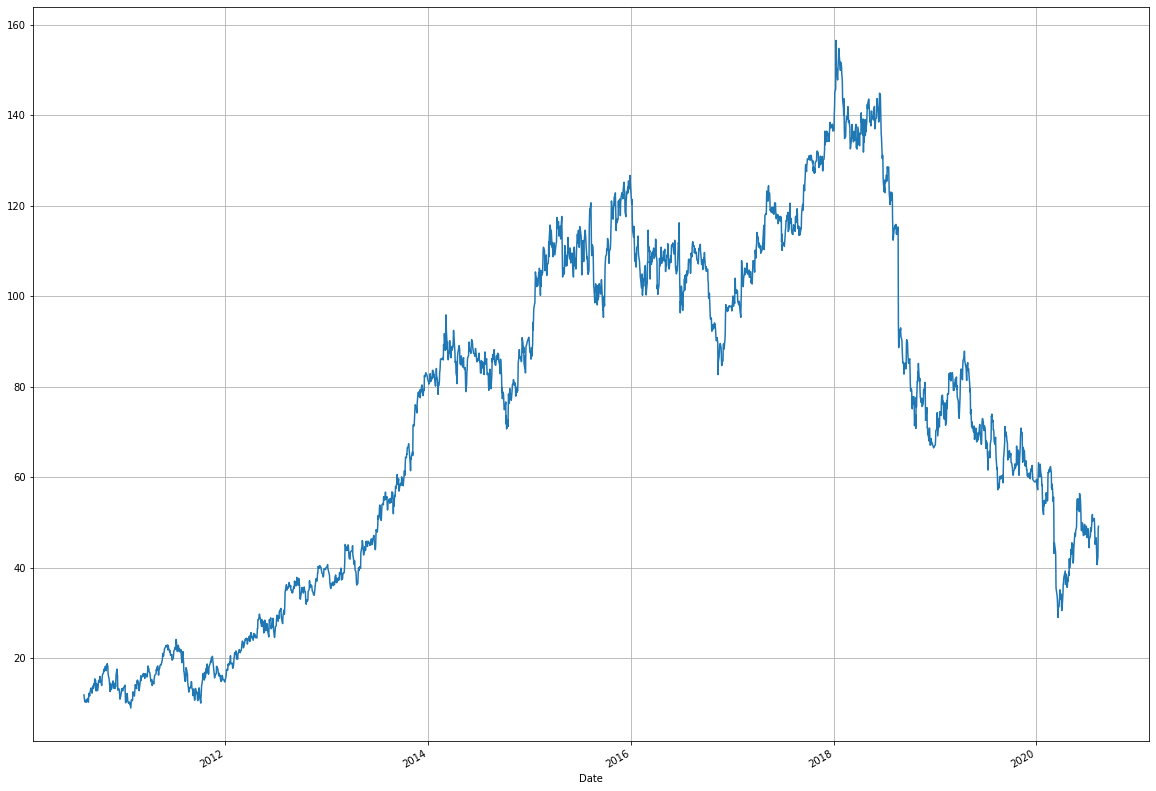

In [205]:
con_dai = dax_prices['CON.DE'] - dax_prices['DAI.DE']
con_dai.plot(grid=True, figsize=(20,15))

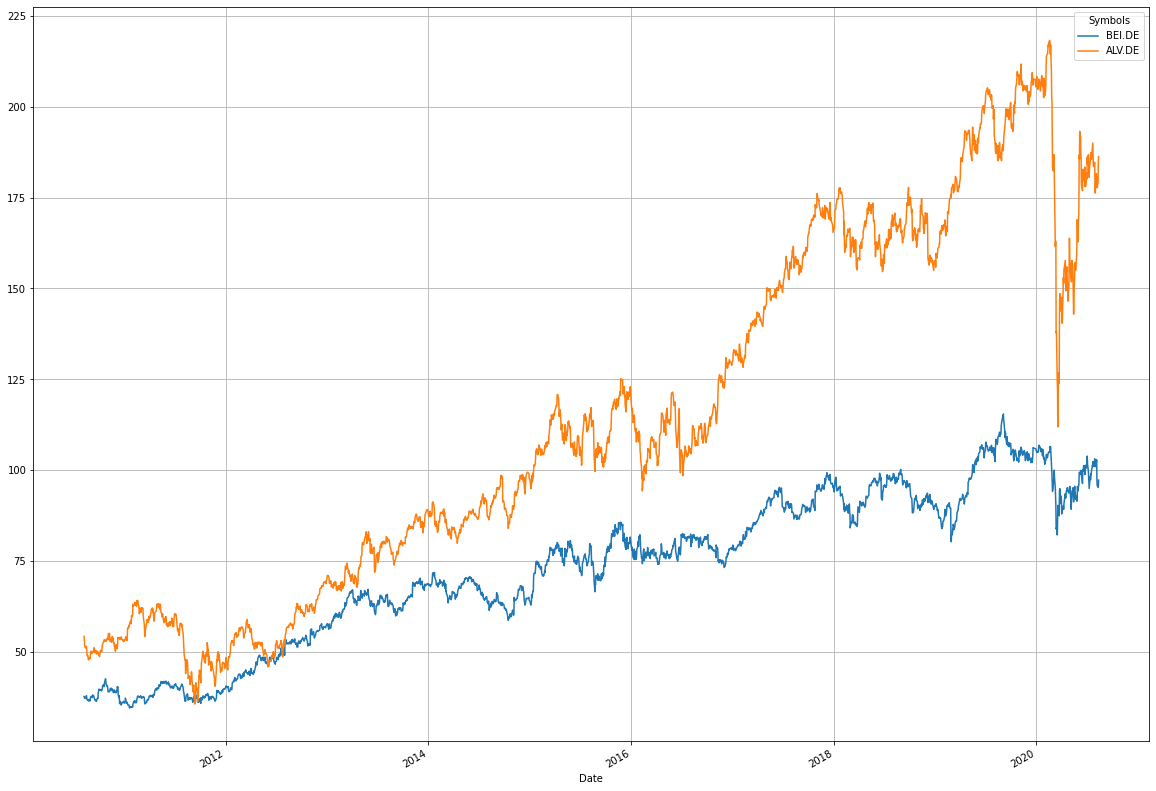

In [201]:
dax_prices[['BEI.DE', 'ALV.DE']].plot(grid=True, figsize=(20,15))

## Cointegration

In [224]:
# Define a function that tests for cointegration between any of the stocks in a DataFrame
def cointegration_finder(dataframe):
    cointegrated = []
    for tick1 in dataframe.columns:
        for tick2 in dataframe.columns:
            if tick1 != tick2:
                Y = np.array(dataframe[tick1])
                X = np.array(dataframe[tick2])
                model = sm.OLS(Y, X)
                result = model.fit()
                beta = result.params
                residuals = Y - beta * X
                cadf = ts.adfuller(residuals)
                p_val = cadf[1]
                if p_val <= 0.05:
                    coin = (tick1, tick2, p_val)
                    cointegrated.append(coin)
    return cointegrated

In [228]:
dax_reduced = dax_prices.drop(columns=['1COV.DE', 'VNA.DE'])

In [229]:
dax_coints = cointegration_finder(dax_reduced)

In [236]:
def third(elem):
    return elem[2]

In [239]:
dax_coints.sort(key=third)
dax_coints

[('HEI.DE', 'HEN3.DE', 0.0014442770370510399),
 ('HEN3.DE', 'HEI.DE', 0.0015740283736898678),
 ('IFX.DE', 'DWNI.DE', 0.002904810535933389),
 ('MTX.DE', 'DB1.DE', 0.0037850537506293677),
 ('DWNI.DE', 'IFX.DE', 0.0038285843434317),
 ('DB1.DE', 'MTX.DE', 0.0044902067791316325),
 ('BMW.DE', 'BAS.DE', 0.011248353200713246),
 ('BAS.DE', 'BMW.DE', 0.011462492087435942),
 ('VOW3.DE', 'EOAN.DE', 0.018838208203225633),
 ('DAI.DE', 'BAYN.DE', 0.01995924885620037),
 ('MTX.DE', 'DWNI.DE', 0.020003115984282838),
 ('EOAN.DE', 'VOW3.DE', 0.02010254170971957),
 ('BAYN.DE', 'DAI.DE', 0.021584006869167567),
 ('SAP.DE', 'MTX.DE', 0.025294425174870374),
 ('DTE.DE', 'MRK.DE', 0.02868591911394122),
 ('DWNI.DE', 'MTX.DE', 0.0286967605405921),
 ('MTX.DE', 'SAP.DE', 0.030795362989416514),
 ('MRK.DE', 'DTE.DE', 0.03104627201122779),
 ('ALV.DE', 'MTX.DE', 0.04463371895782262),
 ('MTX.DE', 'ADS.DE', 0.0458464349828878),
 ('VOW3.DE', 'RWE.DE', 0.04844257378410985),
 ('HEI.DE', 'FRE.DE', 0.04879696172001125),
 ('MTX

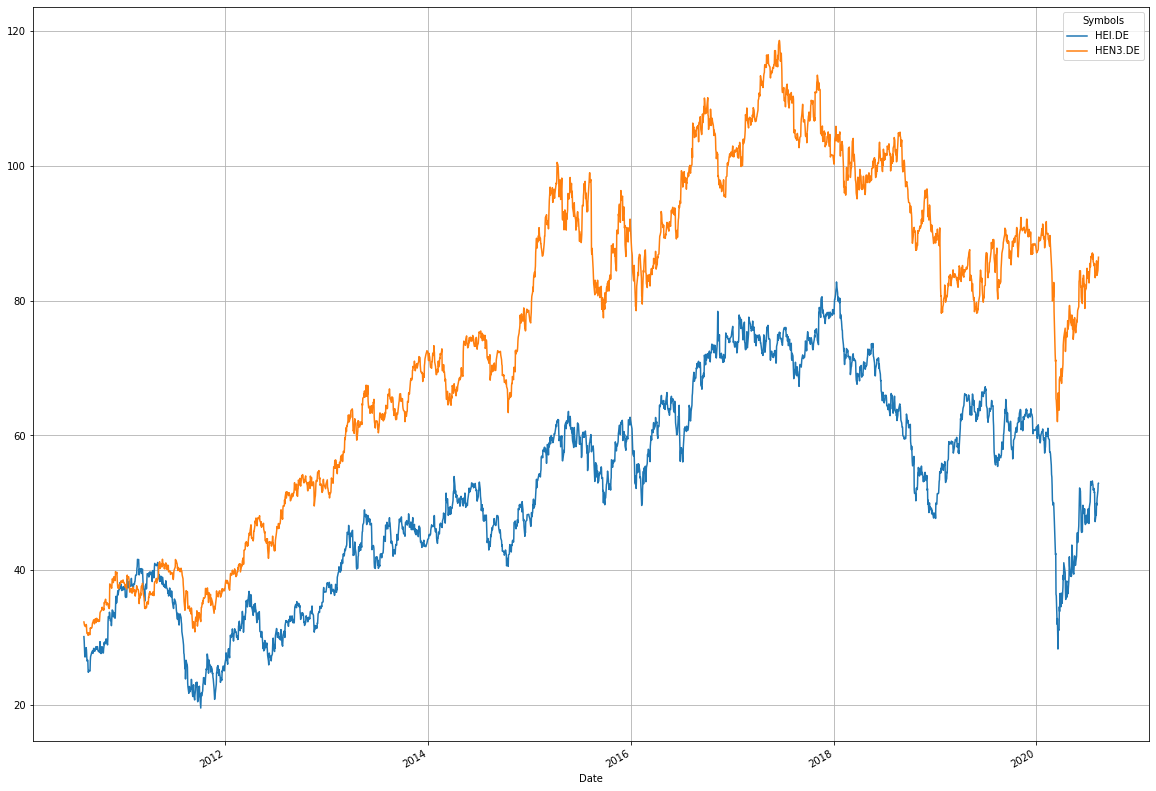

In [240]:
dax_prices[['HEI.DE', 'HEN3.DE']].plot(grid=True, figsize=(20,15))

In [307]:
# Get residuals for HEI and HEN
HEI = np.array(dax_prices['HEI.DE'])
HEN3 = np.array(dax_prices['HEN3.DE'])
model = sm.OLS(HEI, HEN3)
result = model.fit()
beta = result.params
residuals = HEI - beta * HEN3

In [308]:
hei_hen = pd.DataFrame()
hei_hen['HEI.DE'] = HEI
hei_hen['HEN3.DE'] = HEN3
hei_hen['Residuals'] = residuals
hei_hen.index = dax_prices.index

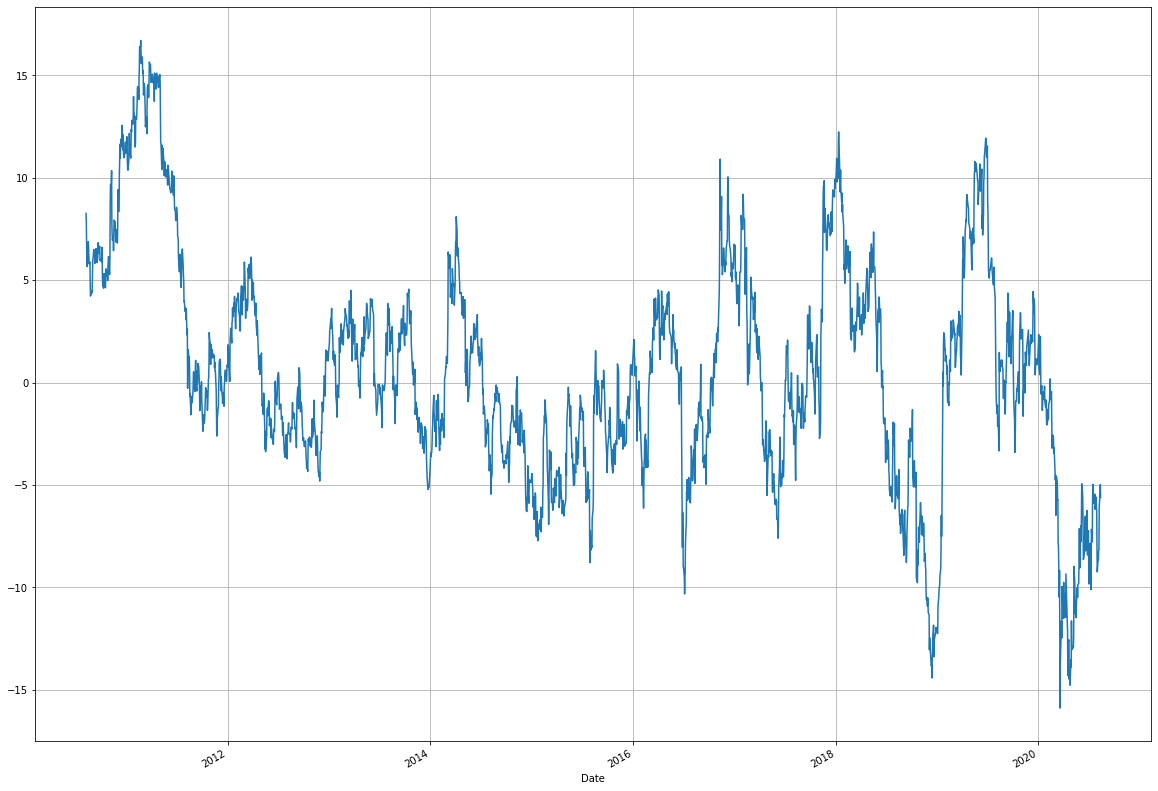

In [257]:
hei_hen['Residuals'].plot(grid=True, figsize=(20,15))

In [324]:
x_range = range(int(dax_prices['HEN3.DE'].min()), int(dax_prices['HEN3.DE'].max()))
y_range = beta * x_range

Text(0, 0.5, 'HEI.DE')

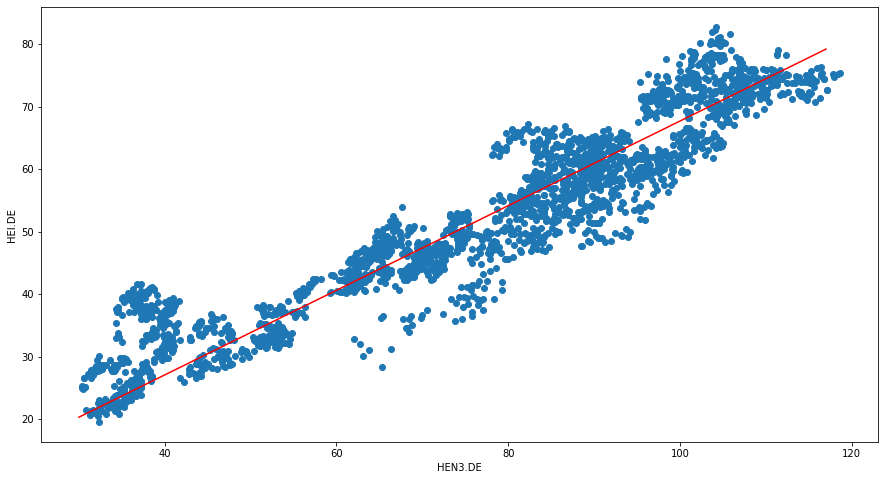

In [323]:
plt.figure(figsize=(15,8))
plt.scatter(dax_prices['HEN3.DE'], dax_prices['HEI.DE'])
plt.plot(x_range, y_range, c = 'r')
plt.xlabel('HEN3.DE')
plt.ylabel('HEI.DE')

In [281]:
mean = hei_hen['Residuals'].mean()
mean

0.5750522302432547

In [282]:
std = hei_hen['Residuals'].std()
std

5.44649958289074

In [299]:
hei_hen['HEI_ret'] = np.log(hei_hen['HEI.DE'] / hei_hen['HEI.DE'].shift(1))
hei_hen['HEN3_ret'] = np.log(hei_hen['HEN3.DE'] / hei_hen['HEN3.DE'].shift(1))

In [286]:
hei_hen.head()

,HEI.DE,HEN3.DE,Residuals,HEI_ret,HEN3_ret
Date,,,,,
2010-08-09,30.135191,32.313820,8.266255,NaN,NaN
2010-08-10,29.458931,32.054886,7.765233,-0.022697,-0.008045
2010-08-11,28.236919,31.828831,6.696208,-0.042367,-0.007077
2010-08-12,27.366869,31.730185,5.892918,-0.031297,-0.003104
2010-08-13,27.101904,31.672655,5.666887,-0.009729,-0.001815


In [331]:
hei_hen['250d'] = hei_hen['Residuals'].rolling(250).std()
hei_hen['-250d'] = hei_hen['250d'] * -1.0

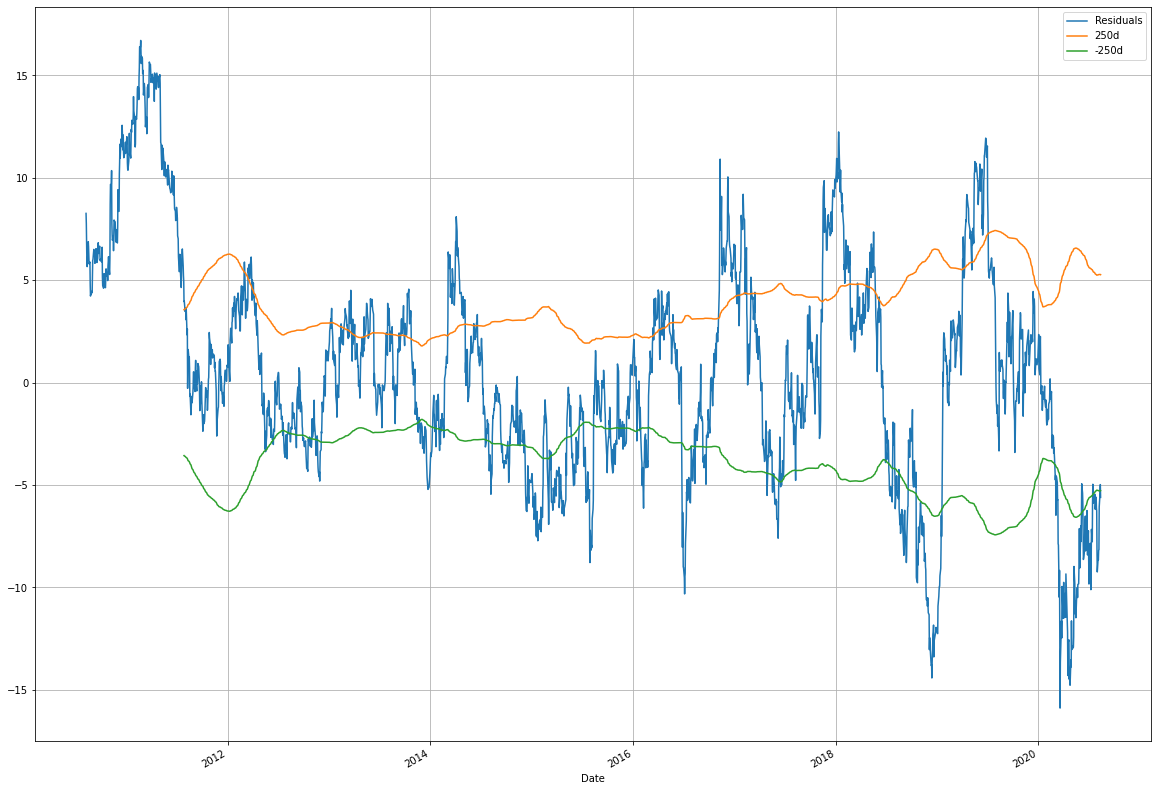

In [332]:
hei_hen[['Residuals', '250d', '-250d']].plot(grid=True, figsize=(20,15))

# Building a Strategy

Knowing that the stocks from the above analysis were cointegrated over the past 10 years is nice but it doesn't mean that we could've built a profitable trading strategy based on that knowledge. In order to do that we need to first develop a strategy that we could backtest over time. 

Here are some initial thoughts: check cointegration at multiple regular intervals and use the resulting beta as the hedge ratio until the next CADF is done and a slightly different beta arises. But how do we know how far to look back when testing for cointegration? After all, we need to make sure to have enough data points to have a statistically significant result from the CADf that is reliable but also want to be able to have a fairly "up-to-date" hedge ratio that closely models the recent relationship between the two stocks. Let's try a window of two years for the CADFs.

But then the next question is: What are our trading signals? When do we go short one stock and long the other? Here, we could use an indicator such as the moving average standard deviation of the residuals over the past two years. If the residual, which is compute don the most recent hedging ratio, is more than a (moving average) standard deviation from the mean (0), a position is entered into. 

Let's see what that would look like for Heidelberg Cement and Henkel.

## Creating sub-dataframes

As a first step, we can split the data into 10 DataFrames, one for each year of stock data, and use these for our underlying analysis. Once we have the first two years we can build the subsequent years including trading signals based on the earlier DataFrames. Let's see how we can split the data equally.

In [341]:
# Find modulus of the length of the DataFrame divided by 10
split_len = int((len(hei_hen) - (len(hei_hen) % 10)) / 10)
split_len

253

In [339]:
hei_hen.head()

,HEI.DE,HEN3.DE,Residuals,126d,250d,-250d
Date,,,,,,
2010-08-09,30.135191,32.313820,8.266255,NaN,NaN,NaN
2010-08-10,29.458931,32.054886,7.765233,NaN,NaN,NaN
2010-08-11,28.236919,31.828831,6.696208,NaN,NaN,NaN
2010-08-12,27.366869,31.730185,5.892918,NaN,NaN,NaN
2010-08-13,27.101904,31.672655,5.666887,NaN,NaN,NaN


In [342]:
# Create first DataFrame
hh_1 = hei_hen.iloc[:split_len, :2]
hh_1

,HEI.DE,HEN3.DE
Date,,
2010-08-09,30.135191,32.313820
2010-08-10,29.458931,32.054886
2010-08-11,28.236919,31.828831
2010-08-12,27.366869,31.730185
2010-08-13,27.101904,31.672655
...,...,...
2011-07-27,31.998762,39.955269
2011-07-28,30.869867,39.758907
2011-07-29,30.567762,39.290955


In [352]:
df_list = ['hei_hen_' + str(i) for i in range(1, 11)]
df_list

['hei_hen_1',
 'hei_hen_2',
 'hei_hen_3',
 'hei_hen_4',
 'hei_hen_5',
 'hei_hen_6',
 'hei_hen_7',
 'hei_hen_8',
 'hei_hen_9',
 'hei_hen_10']

In [356]:
# Create the 10 equally long DataFrames
for i, df in enumerate(df_list):
    vars()[df] = hei_hen.iloc[split_len * i:split_len * (i+1), :2]

In [357]:
hei_hen_2.head()

,HEI.DE,HEN3.DE
Date,,
2011-08-03,28.874413,37.293823
2011-08-04,27.693840,36.378811
2011-08-05,27.518940,35.342640
2011-08-08,25.376413,34.047428
2011-08-09,26.123714,34.728458
